In [1]:
import bz2
import codecs
import itertools
import json

In [2]:
file = r"C:\Users\Shriyak\Desktop\stat578\Project\Initial trial\RC_2016-09.bz2"
file_1m = r"C:\Users\Shriyak\Desktop\stat578\Project\Initial trial\RC_2016-09_1m"
output_file = codecs.open(file_1m,'w+','utf-8')

source_file = bz2.BZ2File(file, "rb")
count = 0
for line in source_file:
    count += 1
    if count <= 1000000:
        output_file.write(line.decode("utf-8") )
source_file.close()
output_file.close()

In [3]:
data = []
with open(file_1m, "r") as f:
    for line in f:
            try:
                if len(data) < 1000000:
                    jfile = json.loads(line)
                    data.append(jfile)
            except ValueError:
                # Not yet a complete JSON value
                line += next(f)
print(len(data), data[-1], data[5])

1000000 {'edited': False, 'distinguished': None, 'retrieved_on': 1475230333, 'body': "Don't waste your  $$$.", 'score': -33, 'id': 'd75c8gd', 'link_id': 't3_50lyuo', 'author': 'GlassKeeper', 'parent_id': 't1_d755d6v', 'ups': -33, 'author_flair_css_class': None, 'stickied': False, 'subreddit': 'gaming', 'author_flair_text': None, 'controversiality': 0, 'subreddit_id': 't5_2qh03', 'created_utc': 1472736337, 'gilded': 0} {'link_id': 't3_50jw83', 'id': 'd74qmxw', 'distinguished': None, 'edited': False, 'retrieved_on': 1475215923, 'body': "&lt;He was yelling at me that it wasn't right to ask for a reference from him and then to quit as soon as he gave it &gt;\n\nHe's a damn idiot for not knowing that the primary reason employees ask for a reference is because they're looking for a different job.  What a dope. ", 'score': 7, 'author_flair_text': None, 'controversiality': 0, 'subreddit_id': 't5_2qjdm', 'created_utc': 1472688000, 'gilded': 0, 'parent_id': 't3_50jw83', 'author': 'Jewel_332211',

In [16]:
import pandas as pd
df = pd.DataFrame(data)
data_sub = df.groupby(['subreddit'])['author'].apply(list)
subs = df.groupby(by='subreddit')['id'].count().sort_values(ascending=False)[:250].index.values

In [18]:
import itertools as it
sub_conn = []
for pair in it.combinations(subs[:100], 2):
    common_elem = list(set(data_sub[pair[0]]).intersection(set(data_sub[pair[1]])))
    #print(common_elem[:5])
    sub_conn.append([pair[0], pair[1], len(common_elem)])
sub_conn[:5]

[['AskReddit', 'funny', 21703],
 ['AskReddit', 'pics', 19125],
 ['AskReddit', 'atheism', 8522],
 ['AskReddit', 'gaming', 12238],
 ['AskReddit', 'IAmA', 12206]]

In [22]:
comm_thresh = 1500
sub_conn1 = [[ele[0], ele[1], int(ele[2]/comm_thresh)] for ele in sub_conn if ele[2]>comm_thresh]
sub_conn1[:10]

[['AskReddit', 'funny', 14],
 ['AskReddit', 'pics', 12],
 ['AskReddit', 'atheism', 5],
 ['AskReddit', 'gaming', 8],
 ['AskReddit', 'IAmA', 8],
 ['AskReddit', 'fffffffuuuuuuuuuuuu', 5],
 ['AskReddit', 'politics', 5],
 ['AskReddit', 'WTF', 7],
 ['AskReddit', 'trees', 3],
 ['AskReddit', 'skyrim', 2]]

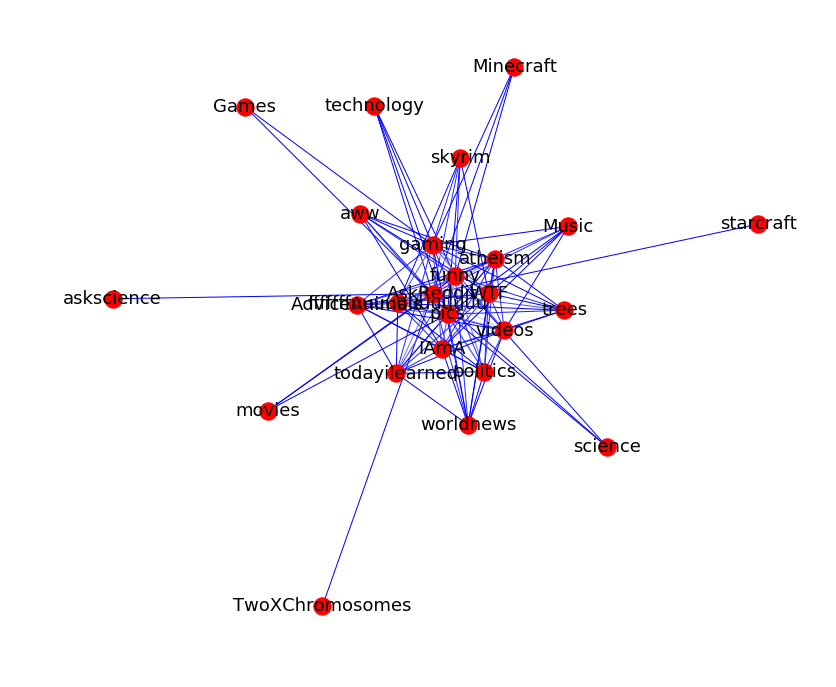

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

g = nx.Graph()
g.add_weighted_edges_from(sub_conn1)

fig, axs = plt.subplots(figsize=(14, 12))
edge_wts = [ele[2] for ele in sub_conn1]
nx.draw_spring(g, ax=axs, edge_color=edge_wts, font_size=18, with_labels=True, \
              edge_cmap= plt.get_cmap('bwr'), edge_vmin=1, edge_vmax=14)

In [5]:
import pandas as pd
df=pd.DataFrame(data)
import pickle
with open('2016_1m.pickle', 'wb') as f:
    pickle.dump(df, f)